***Importing Libraries***

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import copy
import os

***Importing Dataset***

In [3]:
data = pd.read_csv("C:/Users/user/Desktop/insurance.csv")

In [4]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


***Checking the Head of Dataset***

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


***Looking for Missing Values in the Dataset***

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

***Shape of Dataset***

In [8]:
data.shape

(1338, 7)

***Analyzing the Distribution of Variables***

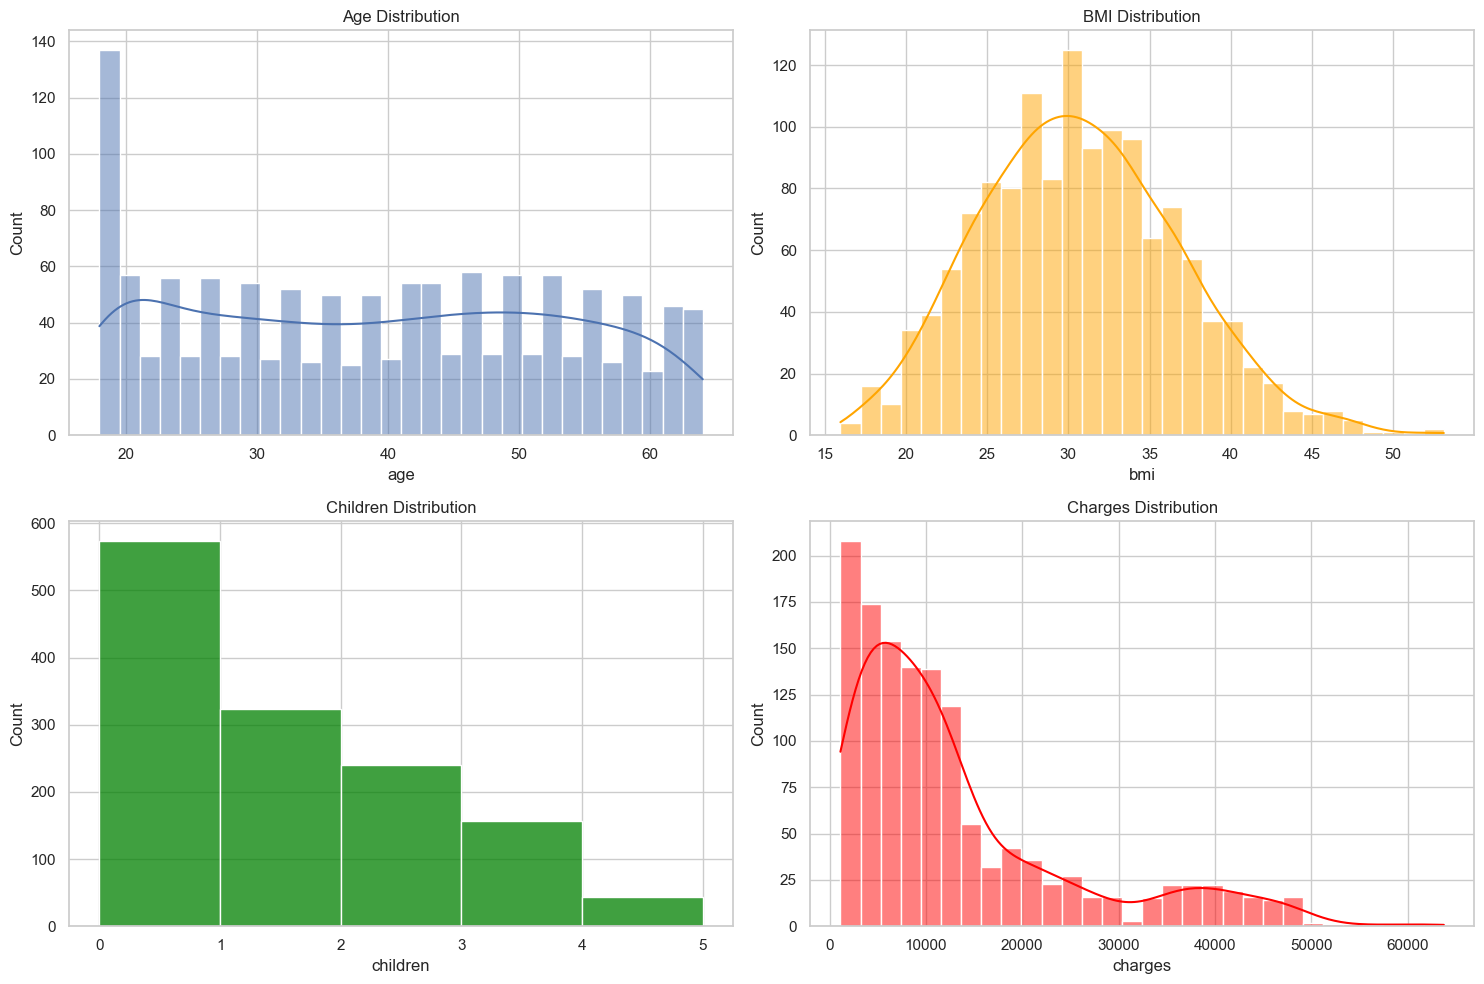

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plotting distributions of 'age', 'bmi', 'children', and 'charges'
sns.histplot(data['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(data['bmi'], bins=30, kde=True, color="orange", ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution')

sns.histplot(data['children'], bins=range(6), kde=False, color="green", ax=axes[1, 0])
axes[1, 0].set_title('Children Distribution')
axes[1, 0].set_xticks(range(6)) # Children count is discrete; hence setting x-ticks to whole numbers

sns.histplot(data['charges'], bins=30, kde=True, color="red", ax=axes[1, 1])
axes[1, 1].set_title('Charges Distribution')

plt.tight_layout()
plt.show()

# Calculating and displaying basic statistics for these variables
basic_stats = data[['age', 'bmi', 'children', 'charges']].describe()
basic_stats


***Calculating the Skewness of each Variable***

In [30]:
# Calculate the skewness of each variable
age_skew = data['age'].skew()
bmi_skew = data['bmi'].skew()
children_skew = data['children'].skew()
charges_skew = data['charges'].skew()

# Print the skewness values
print(f"Skewness of Age: {age_skew}")
print(f"Skewness of BMI: {bmi_skew}")
print(f"Skewness of Children: {children_skew}")
print(f"Skewness of Charges: {charges_skew}")

Skewness of Age: 0.05567251565299186
Skewness of BMI: 0.2840471105987448
Skewness of Children: 0.9383804401702414
Skewness of Charges: 1.5158796580240388


***Looking for outliers in each Variable in the Dataset***

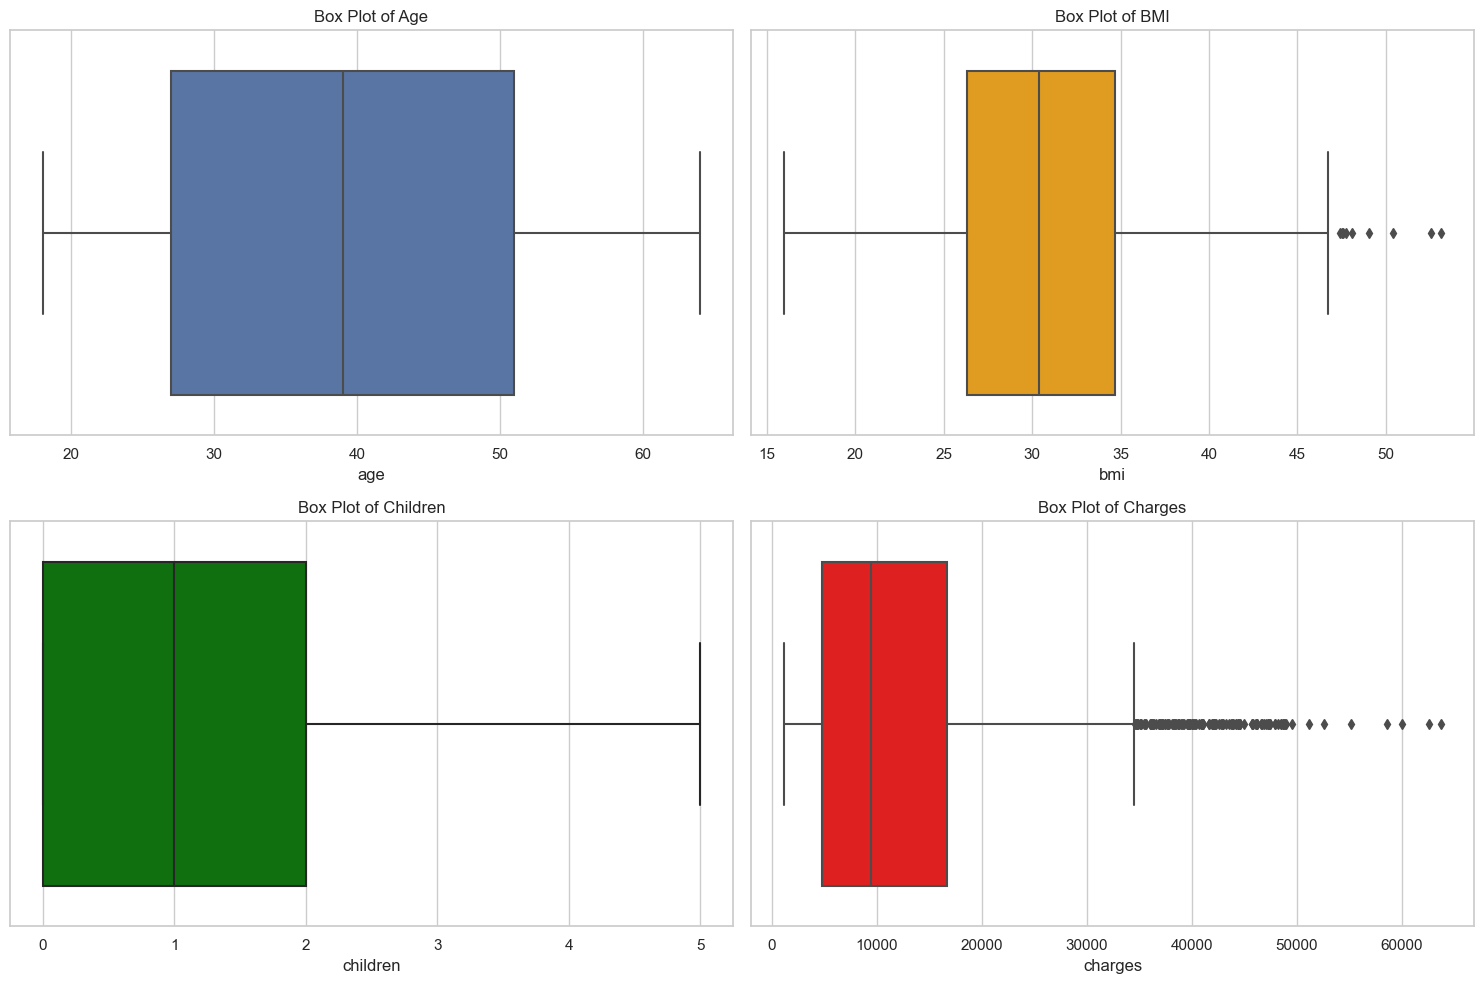

In [31]:
# Creating box plots for each column in the dataset

# Setting the figure size
plt.figure(figsize=(15, 10))

# Box plot for 'age'
plt.subplot(2, 2, 1)
sns.boxplot(x=data['age'])
plt.title('Box Plot of Age')

# Box plot for 'bmi'
plt.subplot(2, 2, 2)
sns.boxplot(x=data['bmi'], color="orange")
plt.title('Box Plot of BMI')

# Box plot for 'children'
plt.subplot(2, 2, 3)
sns.boxplot(x=data['children'], color="green")
plt.title('Box Plot of Children')

# Box plot for 'charges'
plt.subplot(2, 2, 4)
sns.boxplot(x=data['charges'], color="red")
plt.title('Box Plot of Charges')

plt.tight_layout()
plt.show()


***Creating count plots for 'sex', 'smoker', 'region', and 'children'***

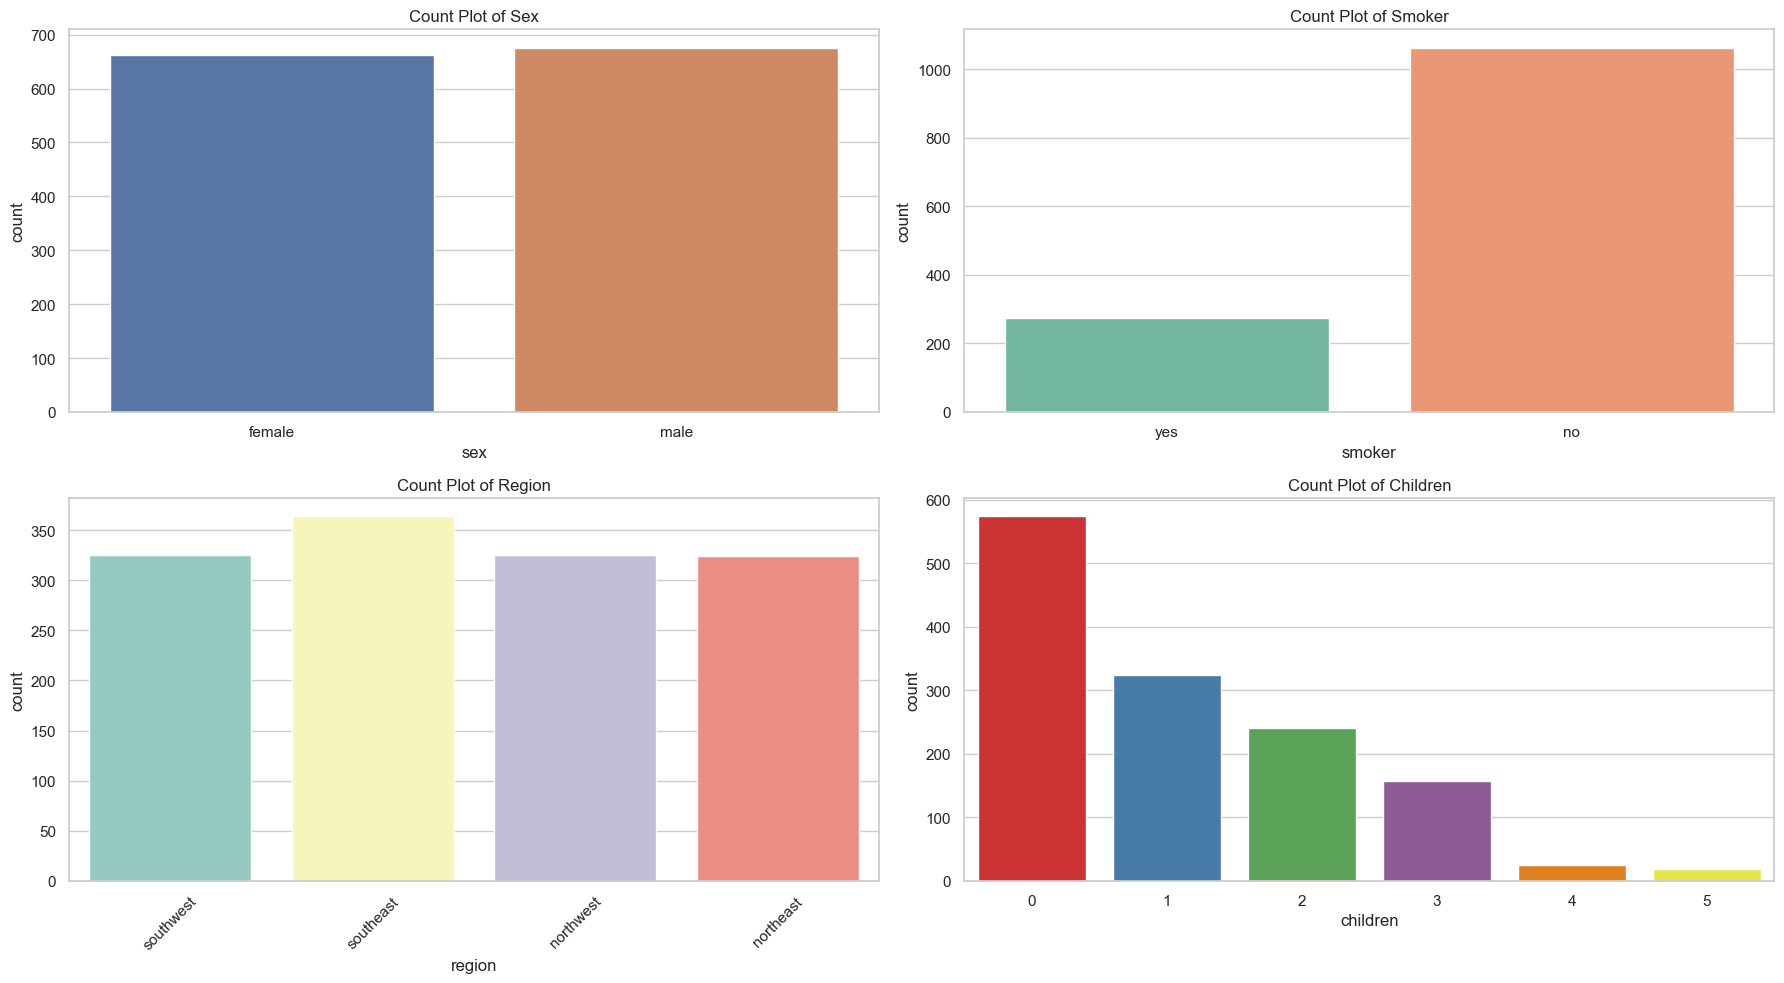

In [32]:
# Setting the figure size
plt.figure(figsize=(18, 10))

# Count plot for 'sex'
plt.subplot(2, 2, 1)
sns.countplot(x=data['sex'])
plt.title('Count Plot of Sex')

# Count plot for 'smoker'
plt.subplot(2, 2, 2)
sns.countplot(x=data['smoker'], palette="Set2")
plt.title('Count Plot of Smoker')

# Count plot for 'region'
plt.subplot(2, 2, 3)
sns.countplot(x=data['region'], palette="Set3")
plt.title('Count Plot of Region')
plt.xticks(rotation=45)  # Rotating the labels for better readability

# Count plot for 'children'
plt.subplot(2, 2, 4)
sns.countplot(x=data['children'], palette="Set1")
plt.title('Count Plot of Children')

plt.tight_layout()
plt.show()


***Creating Scatter plots for 'age', 'bmi', 'children', and 'charges'***

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


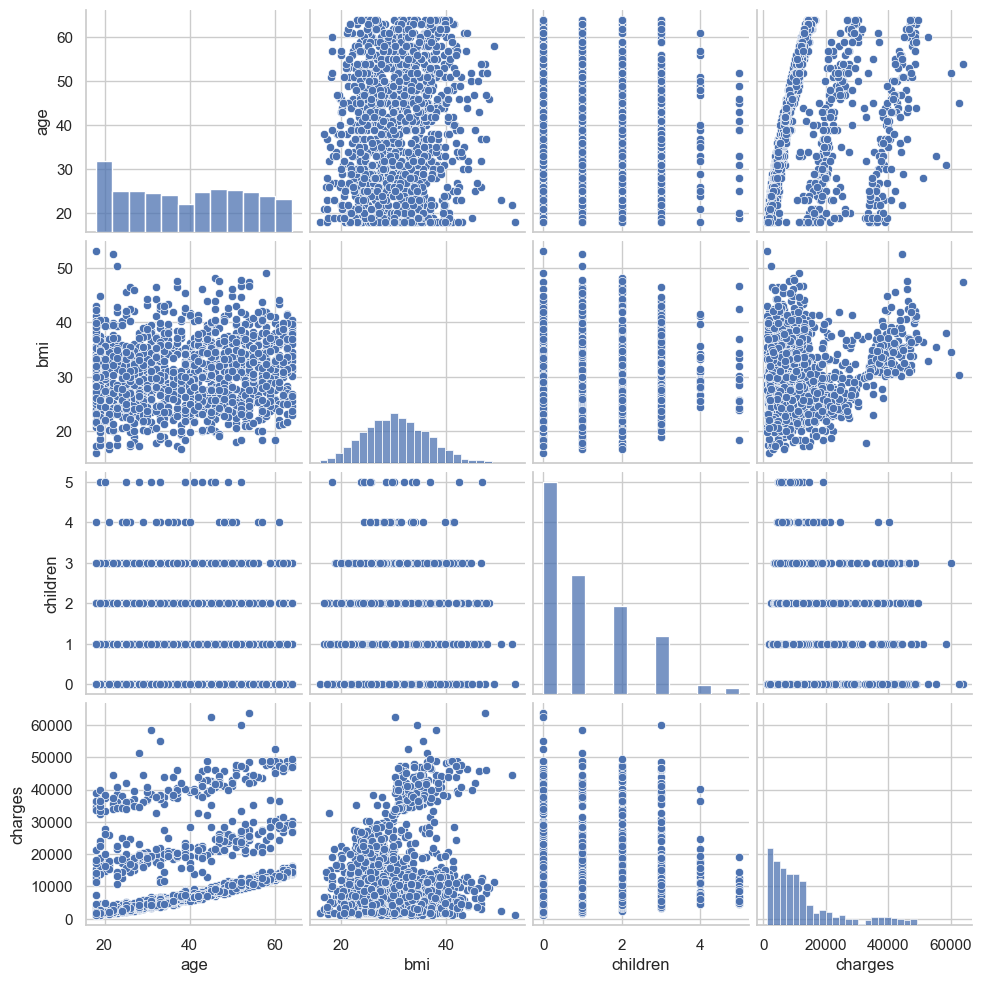

In [34]:
# Creating a pair plot for 'age', 'bmi', 'children', and 'charges'
pairplot_columns = ['age', 'bmi', 'children', 'charges']
sns.pairplot(data[pairplot_columns])
plt.show()

***Calculating the correlation matrix for 'age', 'bmi', 'charges', and 'children'***

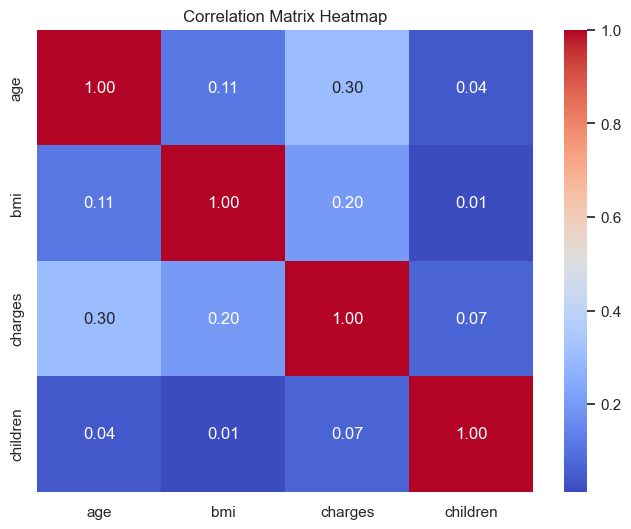

,age,bmi,charges,children
age,1.000000,0.109272,0.299008,0.042469
bmi,0.109272,1.000000,0.198341,0.012759
charges,0.299008,0.198341,1.000000,0.067998
children,0.042469,0.012759,0.067998,1.000000


In [35]:
correlation_matrix = data[['age', 'bmi', 'charges', 'children']].corr()

# Creating a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

correlation_matrix


***Setting up the figure for multiple plots***

***Scatter plot for 'age' vs 'charges', 'bmi' vs 'charges' and 'children' vs 'charges'***

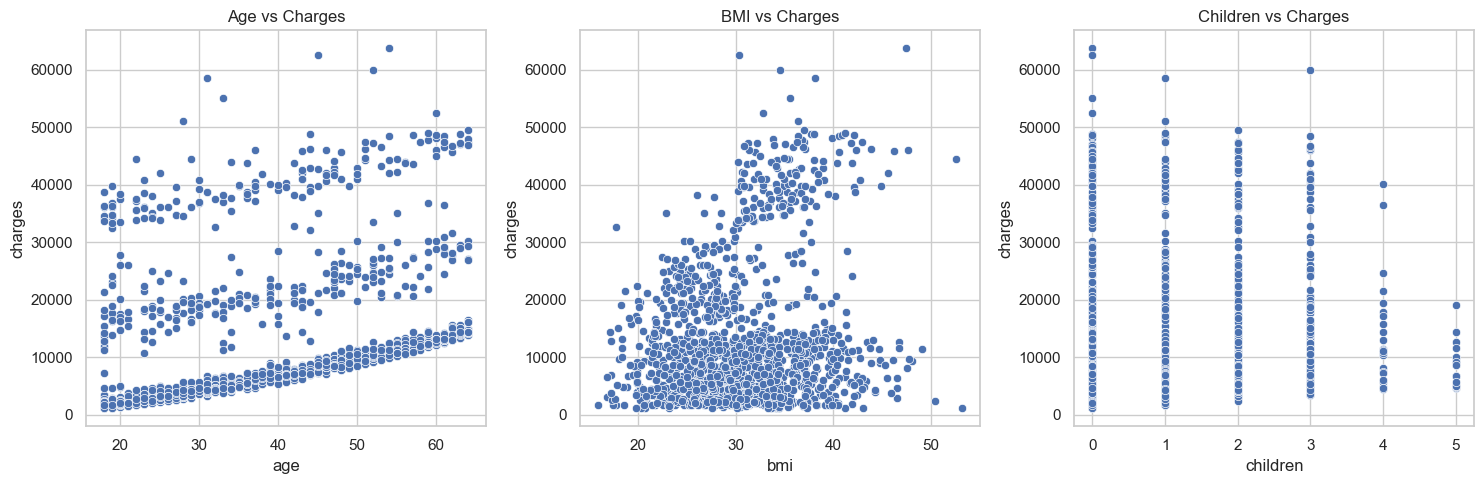

In [44]:
# Setting up the figure for multiple plots
plt.figure(figsize=(15, 5))

# Scatter plot for 'age' vs 'charges'
plt.subplot(1, 3, 1)
sns.scatterplot(x=data['age'], y=data['charges'])
plt.title('Age vs Charges')

# Scatter plot for 'bmi' vs 'charges'
plt.subplot(1, 3, 2)
sns.scatterplot(x=data['bmi'], y=data['charges'])
plt.title('BMI vs Charges')

# Scatter plot for 'children' vs 'charges'
plt.subplot(1, 3, 3)
sns.scatterplot(x=data['children'], y=data['charges'])
plt.title('Children vs Charges')

plt.tight_layout()
plt.show()


***Box plots for categorical variables 'sex' and 'smoker' against 'charges'***

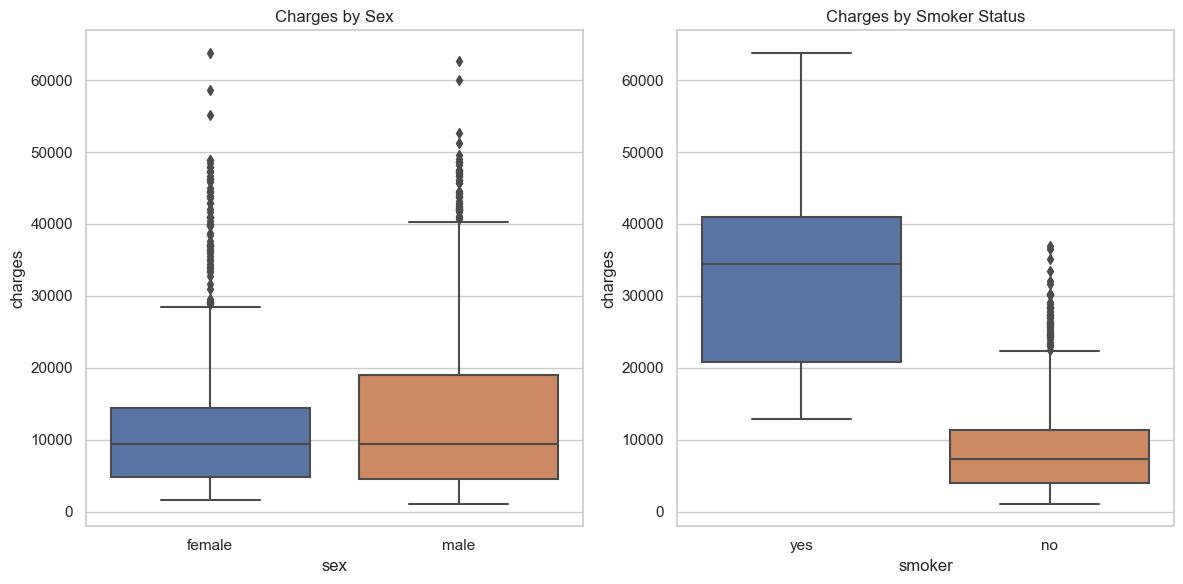

In [46]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['sex'], y=data['charges'])
plt.title('Charges by Sex')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['smoker'], y=data['charges'])
plt.title('Charges by Smoker Status')

plt.tight_layout()
plt.show()

***Calculating Z-scores for 'age', 'bmi', and 'charges'***

In [48]:
from scipy.stats import zscore

# Calculating Z-scores for 'age', 'bmi', and 'charges'
z_scores = data[['age', 'bmi', 'charges']].apply(zscore)

# Identifying outliers as data points where z-score is greater than 3 or less than -3
outliers = (z_scores < -3) | (z_scores > 3)
outlier_counts = outliers.sum()
outlier_counts


age        0
bmi        4
charges    7
dtype: int64

***Splitting of dataset into testing and trainnig set***

In [56]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target (y)
X = data.drop('charges', axis=1)  # Features (excluding 'charges')
y = data['charges']               # Target variable ('charges')

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)  # This converts categorical variables into numeric format

# Splitting the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Displaying the sizes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((936, 8), (402, 8), (936,), (402,))

***Implementation of Linear Regression Model***

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating the Linear Regression model
linear_regression_model = LinearRegression()

# Training the model with the training data
linear_regression_model.fit(X_train, y_train)

# Predicting the charges for the testing data
y_pred = linear_regression_model.predict(X_test)

# Calculating the Mean Squared Error and R-squared value for the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(33780509.574791625, 0.7696118054369012)

***Evaluating the Model Performance***

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have a trained model 'linear_regression_model' and test sets 'X_test', 'y_test'
# Predicting the target values using the model
y_pred = linear_regression_model.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculating R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 33780509.574791625
R-squared (R²): 0.7696118054369012


***Interpreting the coefficients of Linear Regression Model***

In [59]:
# Retrieving the coefficients from the model
coefficients = linear_regression_model.coef_

# Getting the feature names
feature_names = X_train.columns

# Creating a DataFrame to display feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
4,smoker_yes,23628.367222
2,children,424.119128
1,bmi,348.906915
0,age,261.296924
3,sex_male,104.811823
5,region_northwest,-486.934610
7,region_southwest,-926.322908
6,region_southeast,-970.968839


***Impact of different features on Medical Charges***

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming you have a DataFrame called 'data'

# Preparing the data
X = data.drop('charges', axis=1)  # Features
y = data['charges']               # Target

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Retrieve the coefficients of the model
coefficients = model.coef_
features = X_train.columns

# Creating a DataFrame for coefficients
feature_impact = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Function to categorize the impact level
def categorize_impact(coefficient):
    threshold_high = 1000  # Adjust these thresholds as needed
    threshold_medium = 500
    if abs(coefficient) >= threshold_high:
        return "High"
    elif abs(coefficient) >= threshold_medium:
        return "Medium"
    else:
        return "Low"

# Applying the categorization
feature_impact['Impact'] = feature_impact['Coefficient'].apply(categorize_impact)

# Sorting the features by their impact
feature_impact.sort_values(by='Coefficient', ascending=False, inplace=True)

print(feature_impact)


            Feature   Coefficient  Impact
4        smoker_yes  23628.367222    High
2          children    424.119128     Low
1               bmi    348.906915     Low
0               age    261.296924     Low
3          sex_male    104.811823     Low
5  region_northwest   -486.934610     Low
7  region_southwest   -926.322908  Medium
6  region_southeast   -970.968839  Medium


***Implementation of regularized linear models (Ridge, Lasso) for better results***

In [63]:
from sklearn.linear_model import Ridge, Lasso

# Creating Ridge and Lasso Regression models
ridge_model = Ridge(random_state=42)
lasso_model = Lasso(random_state=42)

# Training the models
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Making predictions with Ridge and Lasso models
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluating the models
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

(mse_ridge, r2_ridge), (mse_lasso, r2_lasso)


((33818241.887648836, 0.7693544653450765),
 (33780234.60413269, 0.7696136807784655))

***Conducting a sensitivity analysis to understand the robustness of the model***

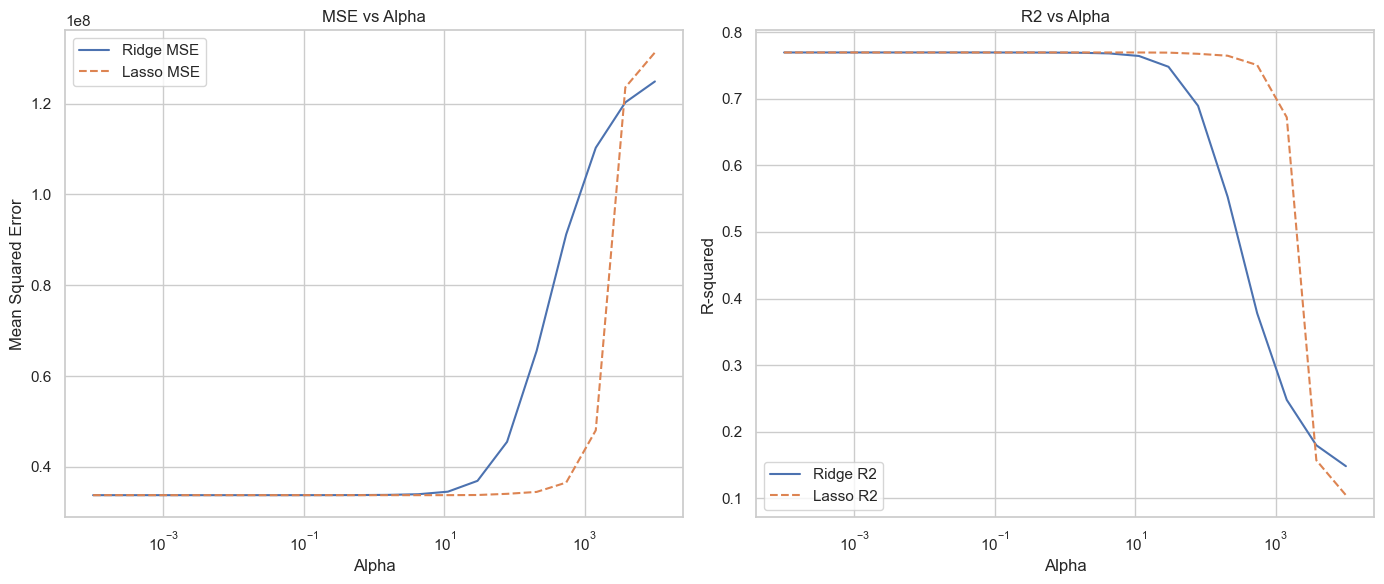

In [64]:
import numpy as np

# Range of alpha values for sensitivity analysis
alpha_range = np.logspace(-4, 4, 20)

# Function to evaluate a model over a range of alphas
def evaluate_model(Model, alpha_range, X_train, y_train, X_test, y_test):
    r2_scores = []
    mse_scores = []

    for alpha in alpha_range:
        model = Model(alpha=alpha)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse_scores.append(mean_squared_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))

    return mse_scores, r2_scores

# Evaluating Ridge and Lasso models
ridge_mse, ridge_r2 = evaluate_model(Ridge, alpha_range, X_train, y_train, X_test, y_test)
lasso_mse, lasso_r2 = evaluate_model(Lasso, alpha_range, X_train, y_train, X_test, y_test)

# Plotting the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(alpha_range, ridge_mse, label='Ridge MSE')
plt.plot(alpha_range, lasso_mse, label='Lasso MSE', linestyle='--')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Alpha')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(alpha_range, ridge_r2, label='Ridge R2')
plt.plot(alpha_range, lasso_r2, label='Lasso R2', linestyle='--')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.title('R2 vs Alpha')
plt.legend()

plt.tight_layout()
plt.show()


***Interpreting the results and highlighting the implications***

***Key Interpretations***
Smoking: Major influence on increasing medical charges.
Age & BMI: Significant predictors of higher medical charges.
Gender & Region: Minor but notable effects on charges.
Children: Slight impact on insurance costs.
Model Performance: Linear regression model is effective but has limitations.
***Key Implications***
Policy & Insurance: Focus on smoking cessation and promoting healthy lifestyles.
Risk Assessment: Age and BMI are crucial for health insurance risk calculations.
Insurance Customization: Tailor products based on demographics like region and family size.
Predictive Modeling: Ridge regression favored for stability in regularized models.
Healthcare Focus: Emphasize preventive healthcare to reduce costs related to lifestyle factors

***Model Challenges and Limitations***

***Linear Assumption:*** May not capture complex, non-linear relationships.
***Outliers' Impact:*** Skewed predictions due to influential outliers, particularly in charges and BMI.
***Collinearity:*** Distorted effects from interrelated predictors.
***Generalizability:*** Limited applicability to different populations or regions.
***Interaction Effects:*** Overlooked interactions between variables.
***Handling Categorical Variables:*** Increased complexity and potential for the dummy variable trap.
***Regularization Challenges:*** Balancing regularization strength to avoid underfitting or overfitting.
***Predictive Precision:*** Limited accuracy for individual predictions, especially for a typical data points